In [10]:
import xarray as xr
import xeofs as xe
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [11]:
t2m = xr.tutorial.open_dataset('air_temperature')
t2m

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [13]:
model = xe.models.EOF(n_modes=10)
model.fit(t2m, dim="time")

In [14]:
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 10)>
array([0.79683524, 0.02702062, 0.02226536, 0.01632093, 0.01500374,
       0.01136572, 0.01082395, 0.0072787 , 0.00684999, 0.00615871],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    model:        EOF analysis
    n_modes:      10
    standardize:  False
    use_coslat:   False
    use_weights:  False
    software:     xeofs
    version:      1.0.5
    date:         2023-08-28 10:43:26

In [16]:
components = model.components()
components

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, mode: 10)
Coordinates:
  * lat      (lat) float32 15.0 17.5 20.0 22.5 25.0 ... 65.0 67.5 70.0 72.5 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Data variables:
    air      (mode, lat, lon) float32 0.0022 0.002131 ... -0.05066 -0.04927

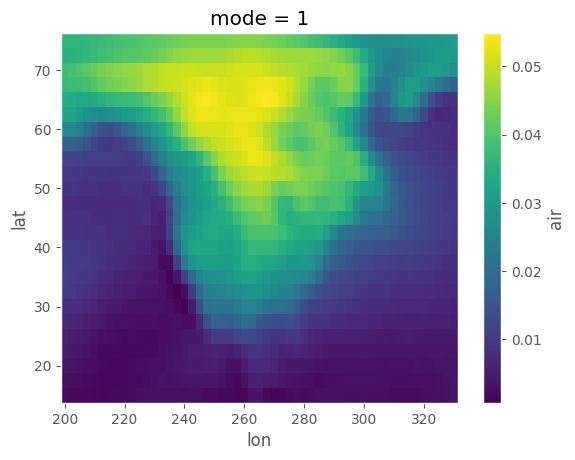

In [17]:
components['air'].sel(mode=1).plot()

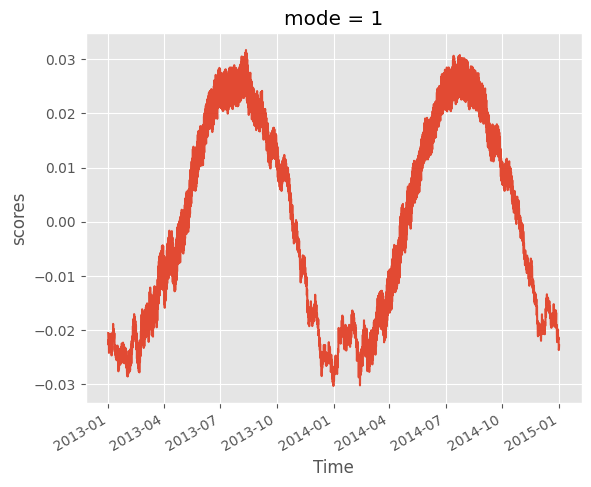

In [18]:
scores = model.scores()
scores.sel(mode=1).plot()